[![DOI](https://zenodo.org/badge/940091341.svg)](https://doi.org/10.5281/zenodo.14939868) <a href="https://www.globh2e.org.au/"><img src="https://img.shields.io/badge/ARC:Funding%20number-IC200100023-blue.svg"/></a>

# **Earth system processes interactions**
<!-- **<div style="text-align: left; font-size: 19px;"> Total human impact on planetary boundaries**</div> -->

<div style="text-align: left; font-size: 16px;">Michaël Lejeune<sup>a,b</sup>, Sami Kara<sup>a,b</sup>, Michael Zwicky Hauschild<sup>c,d</sup>, Sareh Sharabifarahni<sup>a</sup>, Rahman Daiyan<sup>b,e</sup></div><br>

<div style="text-align: left; font-size: 13px;"><sup>a</sup>Sustainability in Manufacturing and Life Cycle Engineering Research Group, School of Mechanical and Manufacturing Engineering, the University of New South Wales, 2052, Sydney, Australia</div>

<div style="text-align: left; font-size: 13px;">
<sup>b</sup>Australian Research Council Training Centre for the Global Hydrogen Economy (GlobH2e), the University of New South Wales, 2052, Sydney, Australia</div>

<div style="text-align: left; font-size: 13px;">
<sup>c</sup>Centre for Absolute Sustainability, Technical University of Denmark, Kgs, Lyngby, Denmark</div>

<div style="text-align: left; font-size: 13px;">
<sup>d</sup>Division for Quantitative Sustainability Assessment (QSA), Department of Environmental and Resource Engineering, Technical University of Denmark, Kgs, Lyngby, Denmark</div>

<div style="text-align: left; font-size: 13px;">
<sup>e</sup>School of Minerals and Energy Engineering, The University of New South Wales, Sydney 2052, Australia</div><br>

<div style="text-align: left; font-size: 13px;"> Code developer and maintainer:<a href="mailto:m.lejeune@unsw.edu.au"> Michaël Lejeune</div></a><br>

# **0. Initialisation**

In [1]:
using LinearAlgebra, Statistics, InvertedIndices 
using JLD2,Distributions,LinearAlgebra
using DataFrames,XLSX
include("Utils/1_00_utils.jl")
include("Utils/general_utils/ssp_utils.jl")
PyPlot.svg(true)


true

In [ ]:
categories=["Energy  Imbalance",
            "CO2  Concentration",
            "Ocean  Acidification",
            "Atmospheric  Aerosol  Loading",
            "Freshwater  Use",
            "Biogeochemical  Flows  P",
            "Biogeochemical  Flows  N",
            "Stratospheric  Ozone  Depletion",
            "Land-System  Change",
            "Biosphere  Integrity"
            ]


10-element Vector{String}:
 "Energy  Imbalance"
 "CO2  Concentration"
 "Ocean  Acidification"
 "Atmospheric  Aerosol  Loading"
 "Freshwater  Use"
 "Biogeochemical  Flows  P"
 "Biogeochemical  Flows  N"
 "Stratospheric  Ozone  Depletion"
 "Land-System  Change"
 "Biosphere  Integrity"

# **2. Total human impact on planetary boundaries $\boldsymbol{h}$**

> <span style="color:rgb(0, 112, 110); font-weight: bold;">Note on mathematical array notations and equations structure</span><br>
> For Matrices, we use bold capital letters, e.g. $\boldsymbol{A}$, and for vectors, we use bold lowercase letters, e.g. $\boldsymbol{a}$. The elements of a matrix are denoted by $A_{ij}$, where $i$ is the row index and $j$ is the column index. For vectors, the elements are denoted by $a_i$, where $i$ is the index of the vector element.<br>
> Note that all coefficients (i.e., $A_{ij}$ and $a_i$) are normalised to assess boundaries and interactions on the same scale.<br><br>
> In general, this For consistency, the numbering of equations will span across all notebooks, so the first equation in this notebook can be recalled in other notebooks.


According to Lade et al.[1], the total human impact $\boldsymbol{h}$ on the Earth system is composed of several kind of interactions, namely:

- **Biophysical interactions $\boldsymbol{B}$**: Naturally occuring interactions betweent the different Earth biophysical systems

- **Human-mediated interactions $\boldsymbol{R}$**: Interactions induced by human activities - Response of human behaviour to a change in the state of a biophysical system.

- **Parallel parallel human impacts $\boldsymbol{P}$**: Parallel human impact on other biophysical systems due to a change in the state of a biophysical system.

Given a direct human impact $\boldsymbol{d}$ and human-mediated interactions influence the state of control variables $\boldsymbol{x}$, the total human impact $\boldsymbol{h}$ can be calculated as in equation (1). 

$$
\boldsymbol{d+Rx+P(d+Rx)=h} \tag{1}
$$

Similarly, naturally occuring interactions given the state of control variables $\boldsymbol{x}$ have an influence on the total human impact, this can be expressed as in equation (2):

$$
\boldsymbol{\left(I-B\right)x = \Gamma_B x =h} \tag{2}
$$

Using equation (1) and (2), we can derive the equation (3) to isolate the state of control variables $\boldsymbol{x}$

$$
\boldsymbol{d+Rx+P\left(d+Rx\right)=\left(I-B\right)x} \tag{3}
$$

Now we solve for $\boldsymbol{x}$, the state of control variables which gives equation (4):

$$
\boldsymbol{\left[ I-(B+R+PR) \right]^{-1} \left( I+P\right)d = \Gamma_H d =x} \tag{4}
$$

Where in equation (4) we have defined $\boldsymbol{\left[ I-(B+R+PR) \right]^{-1} \left( I+P\right)}=\boldsymbol{\Gamma_H}$ as the matrix capturing the full range of interactions based on direct human impact $\boldsymbol{d}$

Now assuming that the human-mediated interactions $\boldsymbol{R}$ and the parallel human impacts $\boldsymbol{P}$ are zero, we can express the state of control variables $\boldsymbol{x}$ as in equation (5).

$$
\boldsymbol{\left(I-B\right)^{-1}d = \Gamma_B d =x} \tag{5}
$$

In equation (4), $\boldsymbol{\left( I-B\right)^{-1}}=\boldsymbol{\Gamma_B}$ the matrix capturing the biophysical interactions. Lastly, if the biophysical interactions $\boldsymbol{B}$ are also zero, we can express the state of control variables $\boldsymbol{x}$ as:

$$
\boldsymbol{d =x} \tag{6}
$$


> <span style="color:rgb(0, 112, 110); font-weight: bold;">Summary of terms</span>
> - $\boldsymbol{B}$ is the biophysical interactions matrix, where $B_{ij}$ is the biophysical interaction of biophysical system $i$ on biophysical system $j$.
> - $\boldsymbol{R}$ is the human-mediated interactions matrix, where $R_{ij}$ is the human-mediated interaction of biophysical system $i$ on biophysical system $j$.
> - $\boldsymbol{P}$ is the parallel human impacts matrix, where $P_{ij}$ is the parallel human impact of biophysical system $i$ on biophysical system $j$.
> - $\boldsymbol{d}$ is the direct human impact vector, where $d_i$ is the direct human impact on biophysical system $i$.
> - $\boldsymbol{x}$ is the state of control variables vector, where $x_i$ is the state of control variable of biophysical system $i$.
> - $\boldsymbol{h}$ is the total human impact vector, where $h_i$ is the total human impact on biophysical system $i$.
> - $\boldsymbol{\Gamma^H}$ is the matrix capturing the full range of interactions based on direct human impact $\boldsymbol{d}$, where $\Gamma_{Hij}$ is the interaction of biophysical system $i$ on biophysical system $j$ based on direct human impact $\boldsymbol{d}$.
> - $\boldsymbol{\Gamma^B}$ is the matrix capturing the biophysical interactions, where $\Gamma^B_{ij}$ is the biophysical interaction of biophysical system $i$ on biophysical system $j$ based on direct human impact $\boldsymbol{d}$.


To illustrate the entire model, Figure 1 shows the interactions model based on Lade et al.[1]. For the analysis in [section 3](#3-analysis) we will assess the how the state of the control variables $\boldsymbol{x}$ is influenced by direct human impact under 3 scenarios:

- **N-PBI**: No interactions -> Equation (6)
- **B-PBI**: Biophysical interactions -> Equation (5)
- **H-PBI**: Human-mediated and parallel human impacts -> Equation (4)

<div style="text-align:center;">
    <figure>
        <img src="../figures/PBI/control_PB.png" width="750">
        <figcaption>
        Figure 1: Total human impact based on the control theory.
        </figcaption>
    </figure>
</div
>


Given  equations (1) to (4), we can define the interaction matrices $\boldsymbol{B}$, $\boldsymbol{R}$ and $\boldsymbol{P}$ directly from Lade et al.[1]. These matrices are available in the [utility file](./Utils/1_00_utils.jl).

## **2.0 data**

In [5]:
𝐁 #Matrix arranged as z⁺z, effect of columns on rows 
# 𝑩


10×10 SparseMatrixCSC{Float64, Int64} with 31 stored entries:
   ⋅    0.22  0.17  0.15   0.12   0.04  0.1   ⋅   -0.56  -0.11
  0.15   ⋅     ⋅     ⋅     0.8    0.02   ⋅    ⋅     ⋅      ⋅ 
  0.38   ⋅     ⋅     ⋅     0.08   1.0    ⋅   1.0    ⋅      ⋅ 
  0.22   ⋅     ⋅     ⋅      ⋅     0.05  1.0   ⋅     ⋅      ⋅ 
  0.1    ⋅     ⋅     ⋅      ⋅      ⋅     ⋅    ⋅     ⋅      ⋅ 
  0.19   ⋅     ⋅     ⋅      ⋅      ⋅     ⋅    ⋅     ⋅      ⋅ 
 -0.07  0.08  0.04  0.06   0.16  -0.03   ⋅    ⋅     ⋅      ⋅ 
 -0.08   ⋅     ⋅     ⋅    -0.11    ⋅     ⋅    ⋅     ⋅      ⋅ 
   ⋅     ⋅     ⋅     ⋅      ⋅     0.1    ⋅    ⋅     ⋅      ⋅ 
 -0.06   ⋅     ⋅     ⋅      ⋅     0.01   ⋅    ⋅     ⋅      ⋅ 

In [6]:
𝐑


10×10 SparseMatrixCSC{Float64, Int64} with 4 stored entries:
  ⋅     ⋅   0.002   ⋅     ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅     ⋅    ⋅      ⋅     ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅     ⋅    ⋅      ⋅     ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅     ⋅    ⋅      ⋅     ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
 0.05   ⋅   0.003  0.02   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅     ⋅    ⋅      ⋅     ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅     ⋅    ⋅      ⋅     ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅     ⋅    ⋅      ⋅     ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅     ⋅    ⋅      ⋅     ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅     ⋅    ⋅      ⋅     ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 

In [7]:
𝐏


10×10 SparseMatrixCSC{Float64, Int64} with 8 stored entries:
  ⋅      ⋅    ⋅    ⋅   0.33  0.005   ⋅   0.018   ⋅   0.52
  ⋅      ⋅    ⋅    ⋅    ⋅     ⋅      ⋅    ⋅      ⋅    ⋅ 
  ⋅      ⋅    ⋅    ⋅    ⋅     ⋅      ⋅    ⋅      ⋅    ⋅ 
  ⋅      ⋅    ⋅    ⋅    ⋅     ⋅      ⋅    ⋅      ⋅    ⋅ 
  ⋅      ⋅    ⋅    ⋅    ⋅     ⋅      ⋅    ⋅      ⋅    ⋅ 
  ⋅      ⋅    ⋅    ⋅   1.3    ⋅      ⋅    ⋅      ⋅    ⋅ 
 0.4     ⋅    ⋅    ⋅    ⋅     ⋅      ⋅    ⋅      ⋅    ⋅ 
 0.065   ⋅    ⋅    ⋅   0.36   ⋅      ⋅    ⋅      ⋅    ⋅ 
  ⋅      ⋅    ⋅    ⋅    ⋅     ⋅      ⋅    ⋅      ⋅    ⋅ 
  ⋅      ⋅    ⋅    ⋅    ⋅     ⋅      ⋅    ⋅      ⋅    ⋅ 

In [8]:
𝚪ᵦ°= Matrix(𝐈-𝐁)^-1 #zz⁺
𝚪ₕ°= Matrix(𝐈-(𝐁+𝐑+𝐏*𝐑))^-1*(𝐈+𝐏);#zz⁺


We re-arrange matrices after calculating the interaction matrices so the effect of the biopshere integrity sub boundaries are accounted. 

In [9]:
𝚪ᵦ=matformat(𝚪ᵦ°)' #z⁺z
𝚪ₕ=matformat(𝚪ₕ°)';


the issue with these matrices is that they are not having the dimensions required to be compatible with the direct human impact $\boldsymbol{d}$, that is obtained from the absolute environmental sustainability assessment (AESA). To solve this issue, we created a function `matformat` available in the [utility file](Utils/1_00_utils.jl) of this notebook. 

Once the matrices are defined, we can compute the human impact matrix $\boldsymbol{\Gamma_H}$ and the biophysical interaction matrix $\boldsymbol{\Gamma_B}$. Note that the int the code below $\boldsymbol{\Gamma_B = \Gamma_\beta}$.

Now we can visualise how some biophysical systems interact with each other. In the results figure below, biophysical systems on the rows axis, are receiving the impact while the columns create the impact. Negative values can be interpreted as a stabilisation potential while positive values as amplification potential.

## **2.1 Visualisations**

### 2.1.1 Interaction matrices

In [10]:
fig, ax = plt.subplots(figsize=(12,7))
kw_ag_font=Dict("fontproperties"=>font_prop, "fontsize"=> 8)
Seaborn.heatmap(,ax=ax,cbar=false,annot=true,annot_kws=kw_ag_font, fmt=".03f",cmap="RdBu_r",vmin=-1,vmax=1.5)
ax.set_xticklabels(catnames_ticks,rotation=0, ha="center",fontproperties=font_prop_labels,fontsize=10)
ax.set_yticklabels(catnames_ticks,rotation=0,fontproperties=font_prop,fontsize=10)
fig.tight_layout()
plt.savefig(respath*"SI_Fig5_B_PBI_interaction_matrix.svg",bbox_inches="tight",transparent=true)
plt.savefig(respath*"SI_Fig5_B_PBI_interaction_matrix.png",dpi=800,bbox_inches="tight",transparent=true)
display(plt.gcf())
plt.close("all")


Base.Meta.ParseError: ParseError:
# Error @ /Users/mickael/Library/CloudStorage/OneDrive-UNSW/Research/Publications/Journal articles/1_Natcoms/Submission/code/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X30sZmlsZQ==.jl:3:17
kw_ag_font=Dict("fontproperties"=>font_prop, "fontsize"=> 8)
Seaborn.heatmap(,ax=ax,cbar=false,annot=true,annot_kws=kw_ag_font, fmt=".03f",cmap="RdBu_r",vmin=-1,vmax=1.5)
#               └──────────────────────────────────────────────────────────────────────────────────────────┘ ── Expected `)`

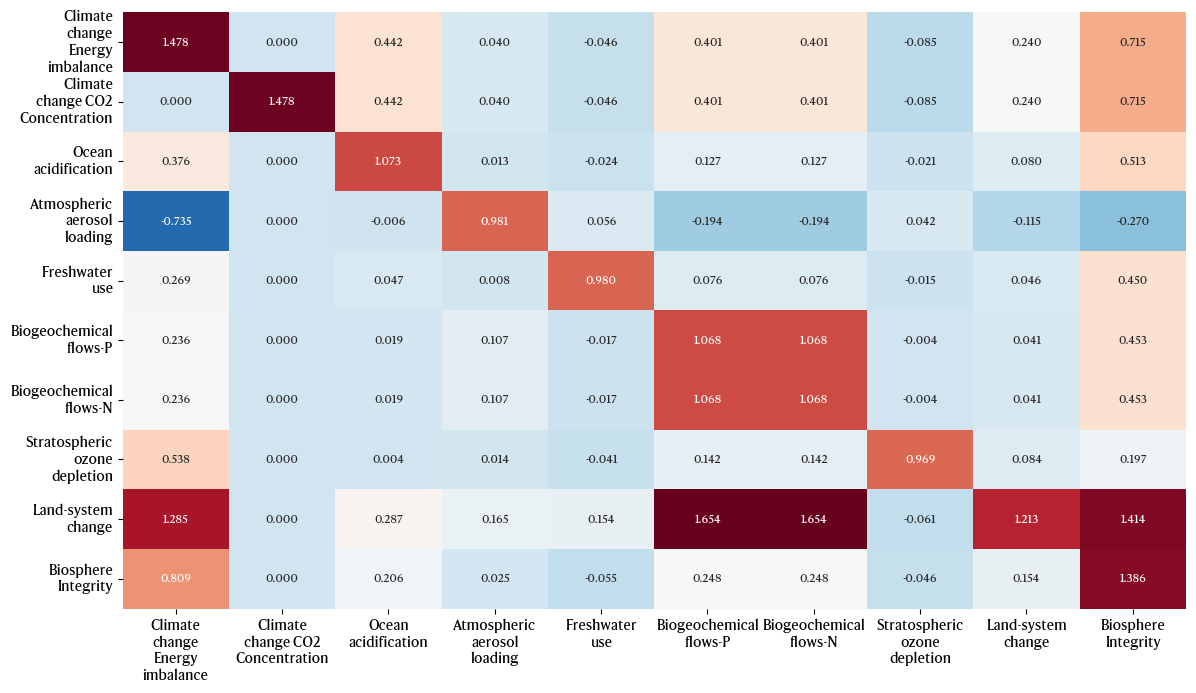

In [11]:
fig, ax = plt.subplots(figsize=(12,7))
kw_ag_font=Dict("fontproperties"=>font_prop, "fontsize"=> 8)
Seaborn.heatmap(𝚪ₕ,ax=ax,cbar=false,annot=true,annot_kws=kw_ag_font, fmt=".03f",cmap="RdBu_r",vmin=-1,vmax=1.5)
ax.set_xticklabels(catnames_ticks,rotation=0, ha="center",fontproperties=font_prop,fontsize=10)
ax.set_yticklabels(catnames_ticks,rotation=0,fontproperties=font_prop,fontsize=10)
fig.tight_layout()
plt.savefig(respath*"SI_Fig6_H_PBI_interaction_matrix.svg",bbox_inches="tight",transparent=true)
plt.savefig(respath*"SI_Fig6_H_PBI_interaction_matrix.png",dpi=800,bbox_inches="tight",transparent=true)
display(plt.gcf())
plt.close("all")


As done in Lade et al.[1]. We can also visualise the strength of the interactions in a force-directed network diagram. To do this, we first need to remove the extra dimensions we have added. and create a new matrix called adjency matrix that does not interfere with what what previously defined. 

### 2.1.2 Force interaction visualisation

In [12]:
𝖘 = s = 1:1:10 


1:1:10

We can now also check the sum of originating magnitudes to validate them against what Lade et al.[1] reported. 

In [13]:
𝐁°=bi_aggregation(𝐁)
𝐏°=bi_aggregation(𝐏)
𝐑°=bi_aggregation(𝐑);


In [14]:
sum(abs.(𝐁°),dims =2)'


1×8 adjoint(::Matrix{Float64}) with eltype Float64:
 1.47  1.56667  0.1  0.19  0.44  0.19  0.1  0.07

Same is done for receiving magnitudes. 


In [15]:
sum(abs.(𝐁°),dims =1)


1×8 Matrix{Float64}:
 0.75  0.72  0.683333  0.536667  0.433333  0.333333  0.56  0.11

These values are identical to those in Lade et al.†(Supplementary material Table 3) but rearranged based on the arrangement of the dimensions of our study. Then we can proceed to the visualisation using a function `force_interactions` available in the [utility file](Utils/1_00_utils.jl) of this notebook.


In [16]:
𝚪h°=(I(8)-(𝐁°+𝐑°+𝐏°*𝐑°))^-1*(I(8)+𝐏°)
𝚪b°=(I(8)-𝐁°)^-1


8×8 Matrix{Float64}:
  1.22791      0.728907    0.392956    …  -0.687628    -0.13507
  0.387792     1.29403     0.453889       -0.217164    -0.0426571
  0.122791     0.0728907   1.0393         -0.0687628   -0.013507
  0.233302     0.138492    0.0746617      -0.130649    -0.0256633
 -0.00350345   0.18941     0.218241        0.00196193   0.00038538
 -0.11174     -0.0663305  -0.145759    …   0.0625741    0.0122913
  0.0233302    0.0138492   0.00746617      0.986935    -0.00256633
 -0.0713414   -0.0423495  -0.0228308       0.0399512    1.00785

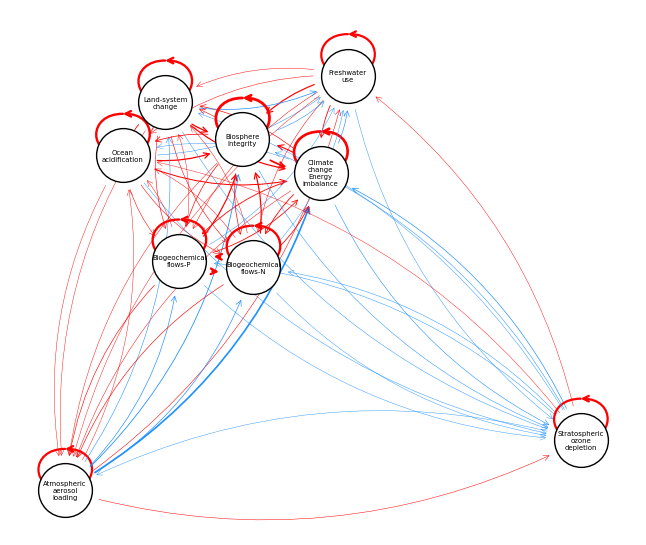

In [17]:
force_interactions(𝚪ᵦ[Not(2),Not(2)],seed=21,node_size=1500,#49
                    arrowsize=10,scale_edge=0.3
                    ,invertyaxis=false,
                    invertxaxis=true,rotation_angle=0,
                    labels=wrap_text.(catnames, 9)[Not(2)],
                    min_source_margin=25,
                    min_target_margin=25,figsize=(6.5, 5.5),max_scale=1.7)


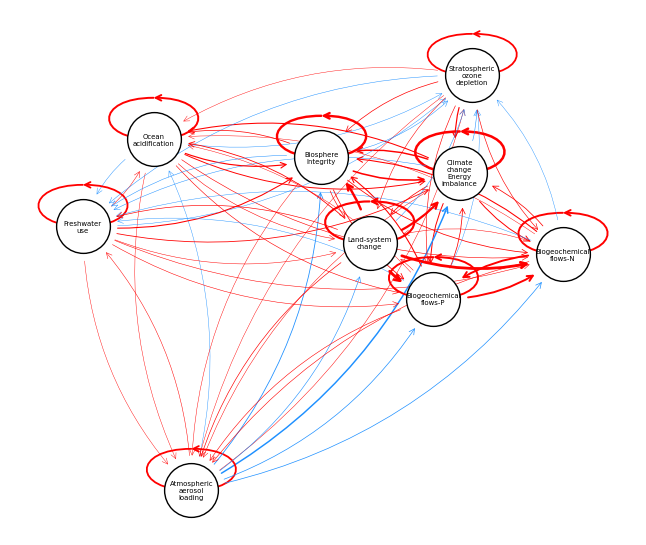

In [18]:
force_interactions(𝚪ₕ[Not(2),Not(2)],seed=23,node_size=1500,#49
                    arrowsize=10,scale_edge=0.3
                    ,invertyaxis=false,
                    invertxaxis=true,rotation_angle=60,
                    labels=wrap_text.(catnames, 9)[Not(2)],
                    min_source_margin=25,
                    min_target_margin=25,figsize=(6.5, 5.5),max_scale=1.7)


# **3. Analysis**

## **3.1 N-PBI: No interactions**

Now, in the hypothetical case that human activities are within their dedicated space without interactions, we can evaluate how much the impacts would be amplified or stabilised.

Applying equation (6) for the N-PBI scenario, using a direct human impact $\boldsymbol{d}$ vector of ones, which hypothetically assumes that the human impact is within the safe operating space, we can compute the state of control variables $\boldsymbol{x}$ when no interactions are involved. 

In [19]:
𝐱=𝐝=ones(10)
print_state(𝐱)


10-element Vector{Pair{String, Float64}}:
  "Climate  change  Energy  imbalance" => 1.0
 "Climate  change  CO2  Concentration" => 1.0
                "Ocean  acidification" => 1.0
       "Atmospheric  aerosol  loading" => 1.0
                     "Freshwater  use" => 1.0
             "Biogeochemical  flows-P" => 1.0
             "Biogeochemical  flows-N" => 1.0
     "Stratospheric  ozone  depletion" => 1.0
                 "Land-system  change" => 1.0
                "Biosphere  Integrity" => 1.0

From there, it can easily be seen that there is no amplification or stabilisation of the human impact, what comes in is what comes out, as expected.

## **3.2 B-PBI: Biophysical interactions**

 Now, we can apply equation (5) for the B-PBI scenario, using, again, the same direct human impact $\boldsymbol{d}$ vector of ones, we can compute the state of control variables $\boldsymbol{x}$ when naturally occuring biophysical interactions are involved.

In [20]:
𝐝 = ones(10)
𝐱ᵦ = 𝚪ᵦ * 𝐝
print_state(𝐱ᵦ)


10-element Vector{Pair{String, Float64}}:
  "Climate  change  Energy  imbalance" => 2.0239142179577616
 "Climate  change  CO2  Concentration" => 2.0239142179577616
                "Ocean  acidification" => 1.9567147742795472
       "Atmospheric  aerosol  loading" => -0.1333919620563463
                     "Freshwater  use" => 1.7556673413573343
             "Biogeochemical  flows-P" => 2.8287757654905867
             "Biogeochemical  flows-N" => 2.8287757654905867
     "Stratospheric  ozone  depletion" => 0.7773694360246464
                 "Land-system  change" => 2.171379364380063
                "Biosphere  Integrity" => 2.4451223370675095

The results are now quite different, we can see that some values are amplified while others are stabilised. 

**Can this be different?** Let us now assume a direct human impact with significantly reduced impact on biospehre integrity, for this we assume that $\boldsymbol{d_{BI}}=0.2$ meaning that the human impact on biosphere integrity is 20% of the safe operating space for this boundary. In the dimensions of this work, it has the index 10 and it is under the variable `ᴮᴵ°` (see [utility file](Utils/1_00_utils.jl)).

In [21]:
𝐝[ᴮᴵ°]=0.2
𝐱ᵦ° = 𝚪ᵦ * 𝐝
Δ𝐱= 𝐱ᵦ°-𝐱ᵦ
print_state(Δ𝐱)


10-element Vector{Pair{String, Float64}}:
  "Climate  change  Energy  imbalance" => -0.3070880718187208
 "Climate  change  CO2  Concentration" => -0.30708807181872055
                "Ocean  acidification" => -0.36536030278866694
       "Atmospheric  aerosol  loading" => 0.17196932021848355
                     "Freshwater  use" => -0.3334860509873958
             "Biogeochemical  flows-P" => -0.341275707989773
             "Biogeochemical  flows-N" => -0.341275707989773
     "Stratospheric  ozone  depletion" => 0.03377968790005925
                 "Land-system  change" => -0.3760675288867146
                "Biosphere  Integrity" => -1.0315924132840693

We can clearly see that now, in several cases, reducing the overall impact on biosphere integrity has stabilised the impact on climate change. However, the impact on biopsphere integrity, due to interactions remains quite high. Let's build a function to investigate how, for instance land use change, and biosphere integrity can be "used" to reduce impact on climate change.

## **3.3 H-PBI: Human-mediated and parallel human impacts**

Now let's do the same but for human-mediated interactions in the H-PBI scenario using equation (4).

In [22]:
𝐝=ones(10)
𝐱ₕ=𝚪ₕ*𝐝
print_state(𝐱ₕ)


10-element Vector{Pair{String, Float64}}:
  "Climate  change  Energy  imbalance" => 3.5872650483630375
 "Climate  change  CO2  Concentration" => 3.5872650483630375
                "Ocean  acidification" => 2.2642124450521623
       "Atmospheric  aerosol  loading" => -0.4329118624742219
                     "Freshwater  use" => 1.9354253790244476
             "Biogeochemical  flows-P" => 2.9724447591864576
             "Biogeochemical  flows-N" => 2.9724447591864576
     "Stratospheric  ozone  depletion" => 2.0490961850257694
                 "Land-system  change" => 7.766678463413963
                "Biosphere  Integrity" => 2.975102813679064

Let us evaluate how human-mediated interactions can amplify even more the interactions between the biophysical systems. 

In [23]:
Δ𝐱ᵢ = 𝐱ₕ-𝐱ᵦ
print_state(Δ𝐱ᵢ)


10-element Vector{Pair{String, Float64}}:
  "Climate  change  Energy  imbalance" => 1.563350830405276
 "Climate  change  CO2  Concentration" => 1.563350830405276
                "Ocean  acidification" => 0.30749767077261514
       "Atmospheric  aerosol  loading" => -0.29951990041787563
                     "Freshwater  use" => 0.1797580376671133
             "Biogeochemical  flows-P" => 0.14366899369587083
             "Biogeochemical  flows-N" => 0.14366899369587083
     "Stratospheric  ozone  depletion" => 1.271726749001123
                 "Land-system  change" => 5.5952990990339
                "Biosphere  Integrity" => 0.5299804766115543

As can be seen, there is quite a change and not in a positive way. The human-mediated interactions generally amplify the interactions between the biophysical systems. Hence it is crucial to consider these types of itneractions.

Same as we have done in the B-PBI scenario, we can check what would be the maximum allowed imapact given the interactions. 

## **3.4. Back-calculating human impact using planetary boundaries interactions**

Let's recall the math. But first we define $\boldsymbol{ \Gamma_H^{-1} = A }$. We define $s$ the set of all control variables. $b$ the set of unknown state control variables for which there are known interactions and lastly $b!$ the remaining set of control variables for which there are known interactions and known states. First we can rearrange equation 4 to obtain equation 7. After that we extract the rows of $\boldsymbol{A}$ using the set $b$.

> <span style="color:rgb(0, 112, 110); font-weight: bold;">Summary of sets</span>
> - $s$ is the set of all control variables.
> - $b$ is the set of unknown state control variables for which there are known interactions.
> - $b!$ is the remaining set of control variables for which there are known interactions and states.

> <span style="color:rgb(239, 75, 5); font-weight: bold;">Note on set structure</span><br>
> $b!,b \in s$ but $b \notin b!$ and $b! \notin b$ 

$$
\boldsymbol{A^{s,s}x^{s} = d^{s}} \tag{7}
$$


In [24]:
𝒮 = 1:1:10 # This represent the set of all planetary boundaries
b = #[3,4] # set of unknown BI state control variables following in the indexes in the matrix 𝚪ₕ° (same as Lade et al.†)
# b=2:10
bꜝ= setdiff(𝒮, b);


UndefVarError: UndefVarError: `b` not defined

In [25]:
# 𝚪ₕ°= Matrix(𝐈-(𝐁+𝐑+𝐏*𝐑))^-1*(𝐈+𝐏) # Matrix arranged as 𝚪z⁺z
𝐀 = 𝚪ₕ°^-1;  # Matrix arranged as 𝚪zz⁺
𝐀 = Matrix(𝐈-𝐁)^-1


10×10 Matrix{Float64}:
  1.22241     0.294938     0.220814    …  -0.684548    -0.134465
  0.285799    1.06896      0.0516262      -0.160047    -0.0314379
  0.595312    0.143635     1.10754        -0.333375    -0.0654843
  0.270469    0.150364     0.0914103      -0.151463    -0.0297516
  0.122241    0.0294938    0.0220814      -0.0684548   -0.0134465
  0.232257    0.0560383    0.0419546   …  -0.130064    -0.0255483
 -0.0100732   0.082676     0.0407336       0.00564097   0.00110805
 -0.111239   -0.0268394   -0.020094        0.0622939    0.0122363
  0.0232257   0.00560383   0.00419546      0.986994    -0.00255483
 -0.0710218  -0.0171359   -0.0128293       0.0397722    1.00781

Here we see that $s$ is the complete set of all control variables. 

In [26]:
# current values with missing states #Lade et al.†
𝐱ˢ = [2, 
    1.5, 
    nothing, 
    nothing, 
    1.5, 
    2.3, 
    0.8, 
    0.65, 
    1.6, 
    0.44] 
𝐱ˢ[s]
print_state(𝐱ˢ, catnames=catlabels_lade[s])


10-element Vector{Pair{String}}:
         "Climate Change" => 2.0
                "BI Land" => 1.5
          "BI Freshwater" => nothing
               "BI Ocean" => nothing
     "Land System Change" => 1.5
   "Biogeochemical Flows" => 2.3
    "Ocean Acidification" => 0.8
         "Freshwater Use" => 0.65
        "Aerosol Loading" => 1.6
 "Strat. Ozone Depletion" => 0.44

The issue here is that $\boldsymbol{x^{s}}$ is partially complete since in it, $\boldsymbol{x^{b}}$ is not known while $\boldsymbol{x^{b!}}$ is known. We can visualise that below 

In [27]:
𝐱ᵇꜝ = 𝐱ˢ[bꜝ]
print_state(𝐱ᵇꜝ, catnames=catlabels_lade[bꜝ])


8-element Vector{Pair{String, Float64}}:
         "Climate Change" => 2.0
                "BI Land" => 1.5
     "Land System Change" => 1.5
   "Biogeochemical Flows" => 2.3
    "Ocean Acidification" => 0.8
         "Freshwater Use" => 0.65
        "Aerosol Loading" => 1.6
 "Strat. Ozone Depletion" => 0.44

In [28]:
𝐱ᵇ= 𝐱ˢ[b]
print_state(𝐱ᵇ, catnames=catlabels_lade[b])



UndefVarError: UndefVarError: `b` not defined

By using equation 10 (derived using equation 8 and 9), it is possible to $\boldsymbol{x^b}$

$$
\boldsymbol{A^{b,s} x^{s} = A^{b,b} x^b + A^{b,b!} x^{b!} = d^b = 0} \tag{8}
$$

we can rearrange equation 8 to isolate $\boldsymbol{x^b}$ equations 9 and 10

$$
\boldsymbol{A^{b,b} x^b = - A^{b,b!} x^{b!}} \tag{9}
$$

$$
\boldsymbol{x^b = - \left[A^{b,b} \right]^{-1} A^{b,b!} x^{b!}} \tag{10}
$$

In [29]:
𝚪=Matrix(𝐈-𝐁)^-1
𝐱ˢ = [3,
      nothing, 
      nothing, 
      nothing, 
      nothing,
      nothing, 
      0.8,
      2,
      nothing,
      1]
𝐱ˢ = [nothing,
      1, 
      1, 
      1, 
      1,
      1, 
      1,
      1,
      1,
      1]
𝐱ˢ = [nothing, 
    nothing, 
    3.8, 
    1.4, 
    1.5, 
    2.3, 
    0.8, 
    0.65, 
    1.6, 
    0.44]

s = 1:1:length(𝐱ˢ) # This represent the set of all planetary boundaries
bꜝ = findall(x -> x !== nothing, 𝐱ˢ)
b = setdiff(s, bꜝ)

𝐱ᵇ= 𝐱ˢ[b] 
𝐱ᵇꜝ = 𝐱ˢ[bꜝ]

𝚪ᵇᵇ= 𝚪[b,b]
𝚪ᵇᵇꜝ = 𝚪[b,bꜝ]
𝚪ᵇꜝᵇꜝ = 𝚪[bꜝ,bꜝ]
𝚪ᵇꜝᵇ = 𝚪[bꜝ,b]


𝐌ᵇᵇꜝ= - (𝚪ᵇᵇ^-1*𝚪ᵇᵇꜝ*𝚪ᵇꜝᵇꜝ^-1)
# 𝐝ᵇ=𝚪ᵇᵇ^-1*((I(2)-𝚪ᵇᵇꜝ*𝚪ᵇꜝᵇ^-1)*𝐱ᵇ-(𝚪ᵇᵇꜝ*𝚪ᵇꜝᵇꜝ^-1*𝐱ᵇꜝ))
# print_state(𝐝ᵇ, catnames=catlabels_lade[b])


2×8 Matrix{Float64}:
 -0.14737    -0.130033  -0.0635765  -0.0336641  …   0.485455    0.0953573
  0.0147322   0.012999  -0.774349   -0.0161523     -0.0485295  -0.00953257

In [30]:
𝐀ᵇᵇ= 𝐀[b,b] # picking out the known interactions for the set b
𝐀ᵇᵇꜝ = 𝐀[b,bꜝ] # picking out the rows known interactions of b but for the set of known control variable bꜝ
𝐱ᵇ = - (𝐀ᵇᵇ^-1*𝐀ᵇᵇꜝ)𝐱ᵇꜝ #solving for 𝐱ᵇ
print_state(𝐱ᵇ, catnames=catlabels_lade[b])


2-element Vector{Pair{String, Float64}}:
 "Climate Change" => -0.9171199999999993
        "BI Land" => -1.2460000000000007

Once we know both $\boldsymbol{x^b}$ and $\boldsymbol{x^{b!}}$ we can recompose $\boldsymbol{x^s}$ and finally estimate the direct human impact using equation 7.

In [31]:
#recomposing 𝐱ˢ
𝐱ˢ[bꜝ]= 𝐱ᵇꜝ
𝐱ˢ[b]= 𝐱ᵇ
print_state(𝐱ˢ, catnames=catlabels_lade)


10-element Vector{Pair{String, Float64}}:
         "Climate Change" => -0.9171199999999993
                "BI Land" => -1.2460000000000007
          "BI Freshwater" => 3.8
               "BI Ocean" => 1.4
     "Land System Change" => 1.5
   "Biogeochemical Flows" => 2.3
    "Ocean Acidification" => 0.8
         "Freshwater Use" => 0.65
        "Aerosol Loading" => 1.6
 "Strat. Ozone Depletion" => 0.44

We have replicated the what Lade et al.† found for these control variables. Now let's recompose our full vector $\boldsymbol{x^s}$. Finally, with the new $\boldsymbol{x^s}$ vector, we can find out what were the direct human impact vector $\boldsymbol{d^{s}}$ that led to this outcome by using equation 7.

In [32]:
𝐝ˢ = 𝐀 * 𝐱ˢ
print_state(𝐝ˢ, catnames=catlabels_lade)


10-element Vector{Pair{String, Float64}}:
         "Climate Change" => -2.0122792321330962e-16
                "BI Land" => 1.5092094240998222e-16
          "BI Freshwater" => 6.704999999999999
               "BI Ocean" => 2.9300000000000006
     "Land System Change" => 1.5000000000000002
   "Biogeochemical Flows" => 2.2999999999999994
    "Ocean Acidification" => 1.4150000000000005
         "Freshwater Use" => 0.4849999999999999
        "Aerosol Loading" => 1.8300000000000005
 "Strat. Ozone Depletion" => 0.463

## **3.5 Back calculating a safe operating space**

When no knowledge of potential human induced interactions

$$
\boldsymbol{(I-B)x = d +R x +P d +P R x}
$$

In [33]:
𝐱⁰=ones(10) #setting all control variables to their boundaries values
𝐝=(𝐈-𝐁)*𝐱⁰
print_state(𝐝, catnames=catlabels_lade)


10-element Vector{Pair{String, Float64}}:
         "Climate Change" => 0.87
                "BI Land" => 0.029999999999999933
          "BI Freshwater" => -1.46
               "BI Ocean" => -0.27
     "Land System Change" => 0.9
   "Biogeochemical Flows" => 0.81
    "Ocean Acidification" => 0.76
         "Freshwater Use" => 1.19
        "Aerosol Loading" => 0.9
 "Strat. Ozone Depletion" => 1.05

However, when human interactions are known, we can directly apply equation (4) as previously defined

$$
\boldsymbol{\Gamma^{-1} x = Ax = d}
$$

In [34]:
𝐝⁰=ones(10)
𝐱=Matrix(𝐈-𝐁)^-1*𝐝⁰
print_state(𝐱, catnames=catlabels_lade)


10-element Vector{Pair{String, Float64}}:
         "Climate Change" => 2.302167007800596
                "BI Land" => 2.3582466464237792
          "BI Freshwater" => 4.09115533279889
               "BI Ocean" => 3.1098020244153184
     "Land System Change" => 1.2302167007800593
   "Biogeochemical Flows" => 1.437411731482113
    "Ocean Acidification" => 1.531454696125082
         "Freshwater Use" => 0.6805028022901458
        "Aerosol Loading" => 1.1437411731482114
 "Strat. Ozone Depletion" => 0.8762440968467855

In [35]:
𝐝=𝐀*𝐱⁰
print_state(𝐝, catnames=catlabels_lade)


10-element Vector{Pair{String, Float64}}:
         "Climate Change" => 2.302167007800596
                "BI Land" => 2.3582466464237792
          "BI Freshwater" => 4.09115533279889
               "BI Ocean" => 3.1098020244153184
     "Land System Change" => 1.2302167007800593
   "Biogeochemical Flows" => 1.437411731482113
    "Ocean Acidification" => 1.531454696125082
         "Freshwater Use" => 0.6805028022901458
        "Aerosol Loading" => 1.1437411731482114
 "Strat. Ozone Depletion" => 0.8762440968467855

# **4. Conclusion**

We have demonstrated programmatically how to fully utilise the interaction models from Lade et al.† to assess the state of control variables. We have notably defined interaction matrices that can be used ($\boldsymbol{𝚪ᵦ}$ and $\boldsymbol{𝚪ₕ}$) when the direct human impact $\boldsymbol{d}$ is known. This is topic of the [next notebook](./2_00_direct_human_impact.ipynb) where $\boldsymbol{d}$ is decomposed and integrated with absolute environmental sustainability assessment. 

In [36]:
@save respath*"data_interaction_matrices.jld2" 𝚪ᵦ 𝚪ₕ catnames_ticks


In [37]:
respath*"data_interaction_matrices.jld2"


"../Source data/02_results//1_00_total_human_impact/data_interaction_matrices.jld2"

# **References**

In [38]:
respath*"data_interaction_matrices.jld2"


"../Source data/02_results//1_00_total_human_impact/data_interaction_matrices.jld2"

In [39]:
if isfile(respath*"interactions_matrices.xlsx")
    rm(respath*"interactions_matrices.xlsx")
end
for (mat,name) in zip([𝐁,𝐑,𝐏],["𝐁","𝐑","𝐏"])
    writetable(DataFrame(hcat(catlabels_lade,mat),vcat("",catlabels_lade)); worksheet=name,workbook=respath*"interactions_matrices.xlsx")
end
for (mat,name) in zip([𝚪ᵦ,𝚪ₕ],["𝚪ᵦ","𝚪ₕ"])
    writetable(DataFrame(hcat(catnames,mat),vcat("",catnames)); worksheet=name,workbook=respath*"interactions_matrices.xlsx")
end


1. Lade, S.J. et al. (2020) ‘Human impacts on planetary boundaries amplified by Earth system interactions’, 3(2), pp. 119–128. Available at: https://doi.org/10.1038/s41893-019-0454-4.
